# STROKE DISEASE ANALYSIS
A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts.

In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

# Aim:


This dataset is used to predict whether a patient is likely to get stroke based on factors like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

FACTORS

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements





refference for dataset :https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# reading my dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
disease= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
disease.shape #they are 51190 rows and 12 columns 

(5110, 12)

In [4]:
disease.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
disease.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
disease.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset contain some missing value in the Bmi column

In [8]:
disease.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# cleaning my dataset 

In [9]:
disease.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**observation**

1. from this datasets, we can see that the BMI column is missing some dataset , inorder to work with this dataset, we have to rectify this missing value 

2. they are two ways to rectify this errors, either to drop the empty column or to fill in the missing values 

3. for our data cleaning, we would fill in this missing values

# for better analysis of our datasets, we group them into numerical and categorical variables , the numerical variables are of the interger and floats data type while the categorical variable are of the object data type

NOTE: THE VARIABLE BMI WHICH CONTAINS MISSING VALUE IS A NUMERICAL VARIABLE TO FILL IT UP, WE USING MEDIANS OR MEAN OF THE DATASET, I WILL FILL THIS DATASET USING OUR MEAN AS ALREADY DESCRIBED AS 28

In [10]:
disease.select_dtypes(include = (['float64','int64'])).isna().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [11]:
disease['bmi'].fillna(disease['bmi'].mean(),inplace=True)

In [12]:
disease.select_dtypes(include = (['float64','int64'])).isna().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [13]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION

In [14]:
disease['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**observation**

1. 0 represnts a patient without stroke while 1 represent a patient with stroke 
2. out of the 5110 patient datas collected ,  249 patients had strokes while 4861 were patients witthout stroke

In [15]:
disease['stroke'].value_counts(normalize = True )*100   #convertedcthe value count to percentage 

0    95.127202
1     4.872798
Name: stroke, dtype: float64

**observation** 
1. we can observe that we have a very skewed distribution, more than half of our datas collected are made up of patients without stroke

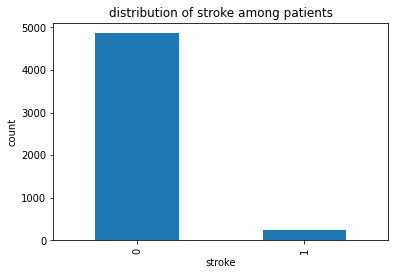

In [16]:
disease['stroke'].value_counts().plot(kind = 'bar')
plt.title('distribution of stroke among patients')
plt.xlabel('stroke')
plt.ylabel ('count')
plt.show()

**observation** 

1. from our data collected, we had a higher percentage of patients without stroke

# we grouped our dataset into two variables 
1. stroke: this will contain all datas of people with stroke
2. without_stroke : this will contain data of patients without stroke

In [17]:
stroke = disease[disease['stroke'] ==1]
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1


In [18]:
without_stroke = disease[disease['stroke']==0]
without_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.000000,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


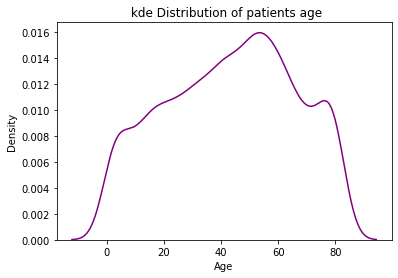

In [19]:
sns.kdeplot(x='age', data=disease, color='purple')
plt.title(' kde Distribution of patients age')
plt.xlabel('Age')
plt.show()

In [20]:
disease['age'].mean()

43.226614481409

In [21]:
disease['age'].median()

45.0

**observation** 
1. we observed that the distribution of the age of patients our data was collected, aproprates a normal distribution 
2. a normal distribution is one that that mean and median are very close to each other
3. from our data , most of our data were collected from patients within the age of 40 _50

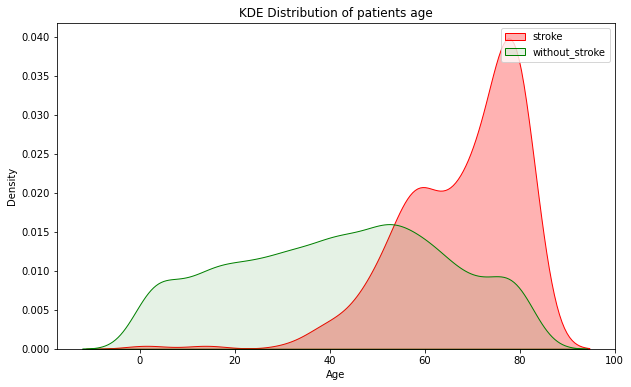

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.kdeplot(x='age', data=stroke , color='red', ax=ax, fill=True, alpha=.3, label='stroke')
sns.kdeplot(x='age', data=without_stroke, color='green', ax=ax, fill=True, alpha=.1, label='without_stroke')
plt.title('KDE Distribution of patients age')
plt.xlabel('Age')
plt.legend()
plt.show()

**observation**
1. from our plot , we can see that we have a higher percentage of patient with stroke within the age ogf 60 to 80 years 
2. the older a person get, the higher the chances of them coming down with stroke
3. to further analyze this, we checked for the mean age of patient with stroke and healthy_patient(patient without stroke)

In [23]:
# let's see the average age of defaulters and non-defaulters
print('stroke_patients average age: ', stroke['age'].mean())
print('without_stroke average age: ',without_stroke['age'].mean())
print('Difference: ', abs(without_stroke['age'].mean() - stroke['age'].mean()))

stroke_patients average age:  67.72819277108434
without_stroke average age:  41.971544949598844
Difference:  25.756647821485494


**observation** 
1. we can observe from our analysis that the average age of patients with stroke is 67 
2. while the average age of people without it is 41 
3. in conclusion stroke disease is more prevalent in older people
4. we would analyze further to determine how correct our analysis is  

In [24]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:xlabel='gender', ylabel='Count'>

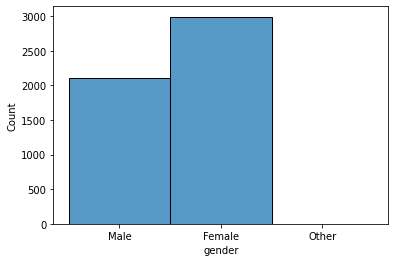

In [25]:
sns.histplot(x="gender",data=disease)

we have a higher distribution of females patients in our dataset

<AxesSubplot:xlabel='gender', ylabel='age'>

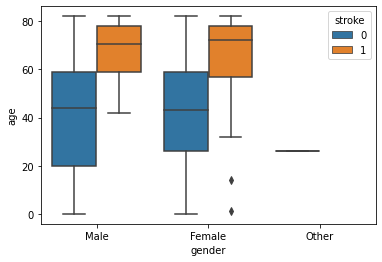

In [26]:
sns.boxplot(x='gender', y='age', data=disease, hue = 'stroke')

**observation**
1. more than 75 percent of our patients with stroke both male and female are above the age of 60 
2. this further reinforce our earlier analysis that the older an indidvidual get, the higher the probability of them having stroke
3. we observed the  presence of outlier in females from our dataset 
4. this outliers symbolizes rare conditions in this case younger females having strokes , they are outliers because it isnt a frequent occurence 
5. situation like this might be due to underlying health conditions or their lifestyle but it has nothing to do with age 

In [27]:
disease['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [28]:
disease['smoking_status'].value_counts(normalize = True)*100  ##change our values to percentage

never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64

from our data collected , we can see that we have a lower percentage of patient with smokers compared to those who smoke  , we visualize further to known the relationship between smoking and stroke 

Text(0.5, 1.0, 'effect of smoking status on stroke')

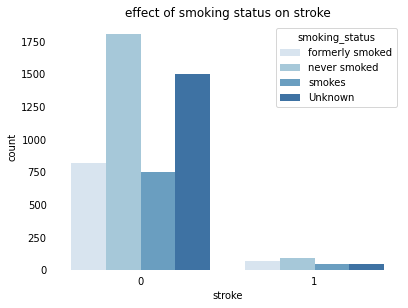

In [29]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,3)
sns.countplot(x=disease['stroke'], hue=disease['smoking_status'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('stroke')
plt.title('effect of smoking status on stroke')


**observation**
1. from our graph above , we can see that most of our patients without stroke also have never smoked in their lifetime 
2. only very few percentage of people from our data , are  both smokers and stroke patients 
3. we also observe that they are a significant amount of  patients that are smokers or formerly used to smoke  but are not patients of stroke  
4. from this , we can deduce that smoking only is not sufficient enough to predict if an individual will  become a stroke patient in the future 

In [30]:
disease['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [31]:
disease['hypertension'].value_counts(normalize = True)*100  ##change our values to percentage 

0    90.254403
1     9.745597
Name: hypertension, dtype: float64

from our data collected , we can see that we have a lower percentage of patient with hypertension compared to those without it , we visualize further to known the relationship between hypertension and stroke 

Text(0.5, 1.0, 'effect of hypertension on stroke')

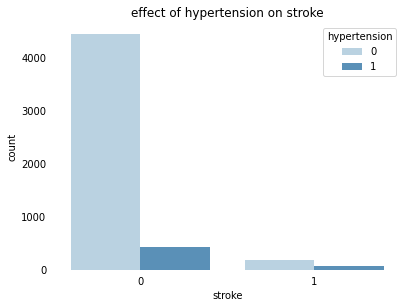

In [32]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=disease['stroke'], hue=disease['hypertension'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('stroke')
plt.title('effect of hypertension on stroke')


**observation**
1. from our graph above , we can see that most of our patients without stroke also have an abscence of underlying hypertensive disease 
2. only very few percentage of people from our data , have both stroke and hypertension 
3. we also observe that they are some patients with hypertension but are not patients of stroke 
4. from this , we can deduce that hypertension is not a very significant derterminant of stroke, that is the probability of a patient been hypertensive and automatically coming down with stroke is low 
5. this simply means that as long as an hypertensive patient  is properly managed, they would be able to live through their life without having stroke 

In [33]:
disease['heart_disease'].value_counts(normalize = True)*100  ##change our values to percentage 

0    94.598826
1     5.401174
Name: heart_disease, dtype: float64

from our data collected , we can see that we have a lower percentage of patient with heart disease compared to those without it , we visualize further to known the relationship between heart_disease and stroke 

Text(0.5, 1.0, 'effect of heart disease on stroke')

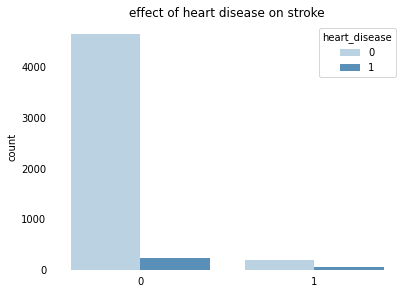

In [34]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,2)
sns.countplot(x=disease['stroke'], hue=disease['heart_disease'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('effect of heart disease on stroke')

**observation**
1. more than half of this data contain individuals without stroke and any underlying disease 
2. only a few percent have heart_disease but show no symptom of stroke 
3. the correlation between stroke and heart_disease is almost non_existance . that is , you cant determine if a person will have stroke mainly due to the prescence of any underlying heart disease from our dataset

In [35]:
disease.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


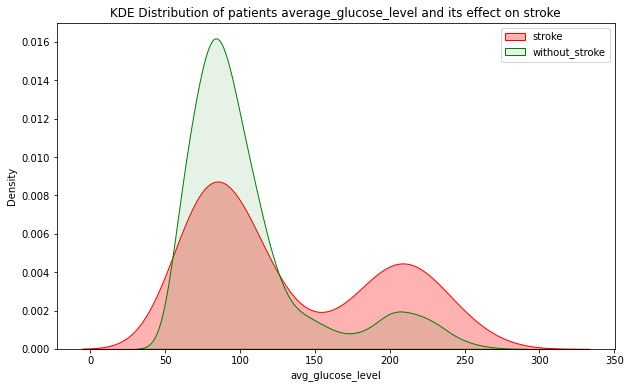

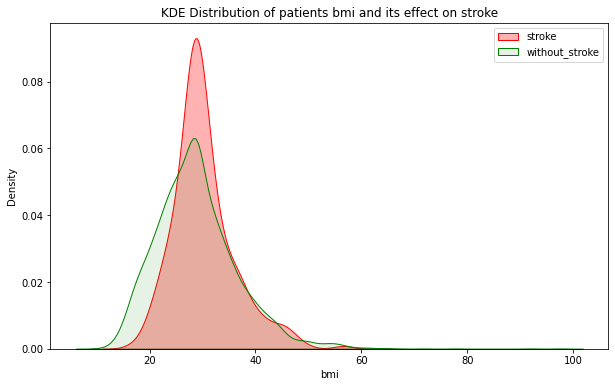

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.kdeplot(x='avg_glucose_level', data=stroke , color='red', ax=ax, fill=True, alpha=.3, label='stroke')
sns.kdeplot(x='avg_glucose_level', data=without_stroke, color='green', ax=ax, fill=True, alpha=.1, label='without_stroke')
plt.title('KDE Distribution of patients average_glucose_level and its effect on stroke')
plt.xlabel('avg_glucose_level')
plt.legend()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.kdeplot(x='bmi', data=stroke , color='red', ax=ax, fill=True, alpha=.3, label='stroke')
sns.kdeplot(x='bmi', data=without_stroke, color='green', ax=ax, fill=True, alpha=.1, label='without_stroke')
plt.title('KDE Distribution of patients bmi and its effect on stroke')
plt.xlabel('bmi')
plt.legend()
plt.show()


**observation for Bmi**

1. we can observe that the mean and median value for  bmi and of a patient are at the same point 
2. likewise the distribution of patients with stroke and the  without stroke also peaked at the same point 
3. from this data , we will find it very difficult in predicting a patients chances of having stroke based of their Bmi


*observation for average glucose level*
1. The avaerage glucose level of a patient has 2 peaks
2.  we observed from the graph that the second peak indicates  higher the average glucose level of a patient , the higher the chances of them having stroke
3. average glucose level and age of a patient has the strongest correlation with stroke from our analysis , thus if a person glucose level isnt properly managed, the chances of them having stroke is high

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

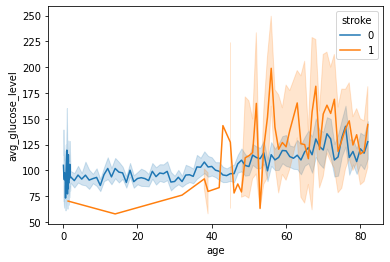

In [57]:
sns.lineplot(x = 'age', y ='avg_glucose_level', hue = 'stroke', data = disease)

**observation**
1. from our data , we can see that they is a positive correlation between age of a patient and their blood glucose level 
2. we can deduce from our dataset that  increase in age increases  a patient chances of having a high blood glucose level  thus increasing their stroke chances 
